In [9]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3 import A2C
import random
import os
from stable_baselines3.common.vec_env import DummyVecEnv

import warnings
warnings.filterwarnings('ignore')

In [15]:
models_dir = "models/PPO"
logdir = "logs"

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

env = gym.make('BipedalWalker-v3')
env.reset()

model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=logdir)

TIMESTEPS = 10000

for i in range(1,500):
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="PPO")
    model.save(f"{models_dir}/{TIMESTEPS*i}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.6e+03  |
|    ep_rew_mean     | -107     |
| time/              |          |
|    fps             | 5788     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.6e+03     |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 4542        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010068956 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Collect rewards during evaluation episodes
episode_rewards = []
env = gym.make('BipedalWalker-v3')
model = PPO.load('models/PPO/290000')  # Load the last saved model (adjust if needed)
num_episodes = 500
for ep in range(num_episodes):
    obs, _ = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        if done or truncated:
            break
    episode_rewards.append(total_reward)
print('Episode rewards:', episode_rewards)

Episode rewards: [np.float32(257.82556), np.float32(91.88573), np.float32(-88.122314), np.float32(-17.528198), np.float32(-60.272686), np.float32(262.46597), np.float32(249.69772), np.float32(257.96323), np.float32(262.1932), np.float32(255.32933), np.float32(-74.42397), np.float32(-58.050945), np.float32(-60.89003), np.float32(255.7635), np.float32(256.0172), np.float32(219.79105), np.float32(-34.80738), np.float32(-41.292194), np.float32(259.22592), np.float32(51.429916)]


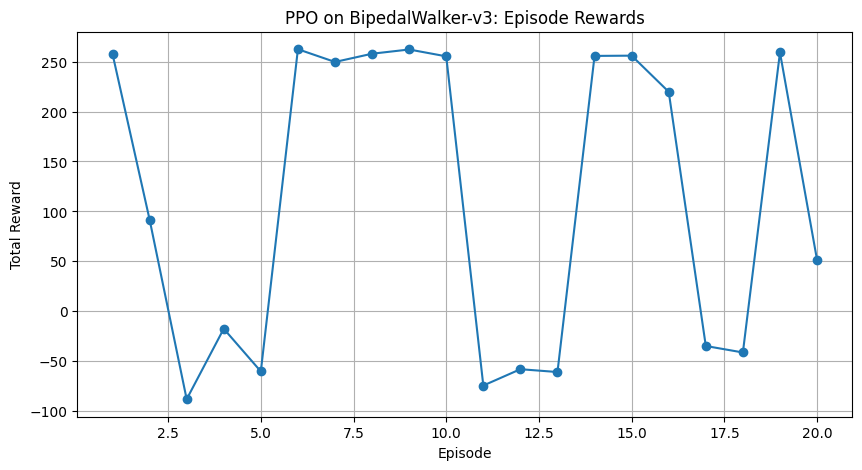

In [13]:
# Plot rewards vs episodes
plt.figure(figsize=(10,5))
plt.plot(range(1, len(episode_rewards)+1), episode_rewards, marker='o')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('PPO on BipedalWalker-v3: Episode Rewards')
plt.grid(True)
plt.show()

In [14]:
# Generate video of the trained agent
import imageio
video_frames = []
env = gym.make('BipedalWalker-v3', render_mode='rgb_array')
obs, _ = env.reset()
done = False
while not done:
    frame = env.render()
    video_frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    if done or truncated:
        break
env.close()
video_path = 'bipedalwalker_ppo_demo.mp4'
imageio.mimsave(video_path, video_frames, fps=30)
from IPython.display import Video
Video(video_path, embed=True, width=600, height=400)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
